In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [3]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
y_test.shape

(38,)

In [7]:
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [14]:
class_names.shape

(3,)

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels = classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i in range(cm.shape[1]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j]> thresh else 'black')
    fig.tight_layout()
    return ax

In [37]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


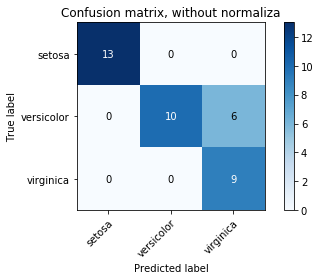

In [38]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normaliza')

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


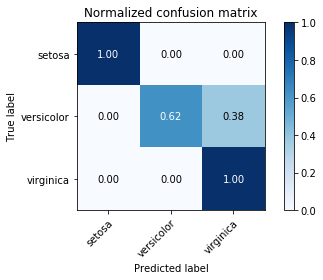

In [39]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')